<a href="https://colab.research.google.com/github/mansi-123-stack/Google-Colab-/blob/main/Google_Playstore_EDA_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Apps Rating Prediction
This project performs Exploratory Data Analysis (EDA) on a dataset of apps from the Google Playstore. It involves cleaning, transforming, visualizing, and deriving insights from the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [7]:
df = pd.read_csv('googleplaystore_sample.csv')
df.head()


,App,Category,Rating,Reviews,Installs,Price
0,Photo Editor,PHOTOGRAPHY,4.5,150000,"10,000,000+",$0
1,Messenger Lite,COMMUNICATION,4.2,320000,"100,000,000+",$0
2,Candy Crush,GAME,4.4,980000,"500,000,000+",$0
3,Zoom,BUSINESS,4.3,87000,"50,000,000+",$0
4,CamScanner,PRODUCTIVITY,4.6,54000,"10,000,000+",$0


## Data Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       5 non-null      object 
 1   Category  5 non-null      object 
 2   Rating    5 non-null      float64
 3   Reviews   5 non-null      int64  
 4   Installs  5 non-null      object 
 5   Price     5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 372.0+ bytes


In [9]:
df.describe()

,Rating,Reviews
count,5.000000,5.000000
mean,4.400000,318200.000000
std,0.158114,383903.894224
min,4.200000,54000.000000
25%,4.300000,87000.000000
50%,4.400000,150000.000000
75%,4.500000,320000.000000
max,4.600000,980000.000000


## Data Cleaning

In [18]:

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df.dropna(subset=['App', 'Category'], inplace=True)

In [12]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)
df['Reviews'] = df['Reviews'].astype(int)

## Visualizations

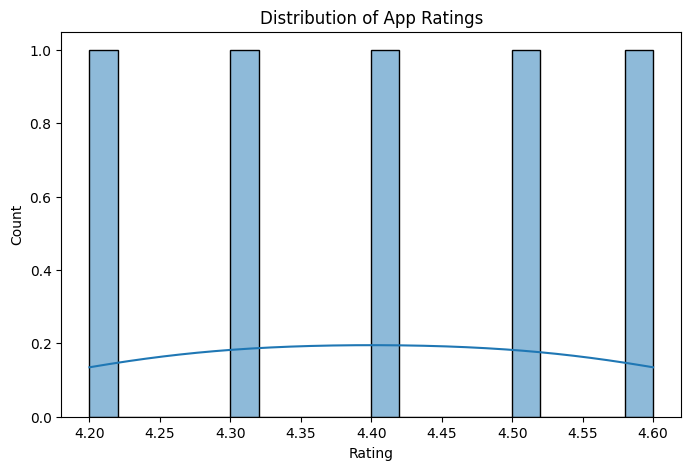

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

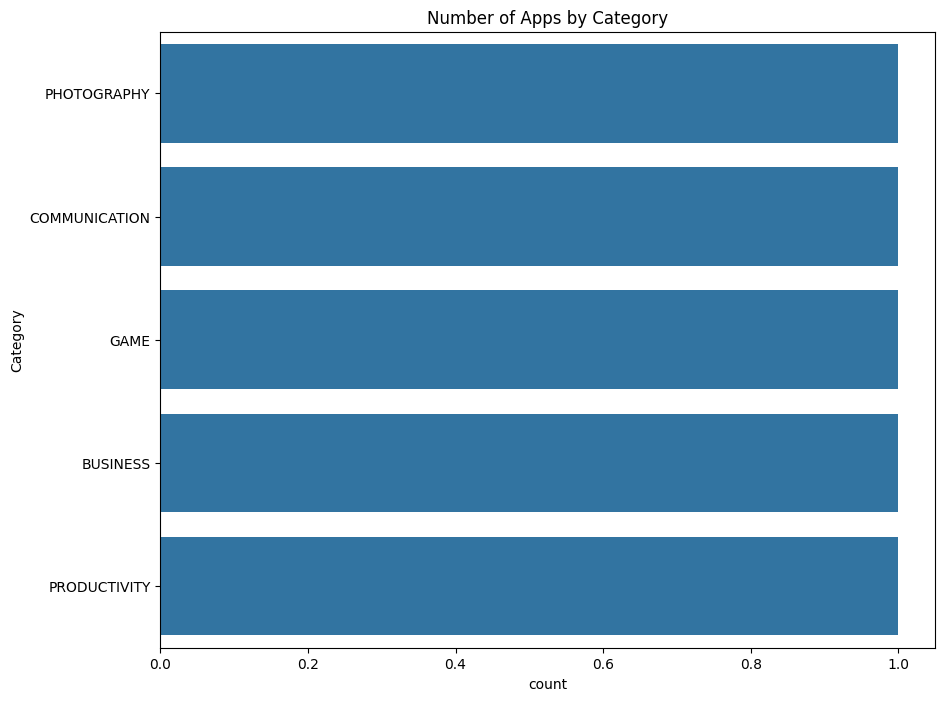

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps by Category')
plt.show()

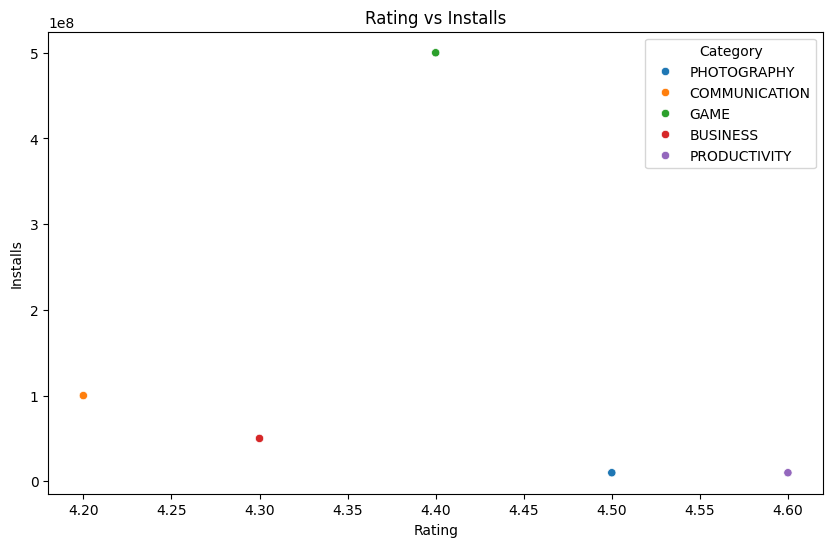

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Installs', hue='Category', data=df)
plt.title('Rating vs Installs')
plt.show()

## Correlation Heatmap

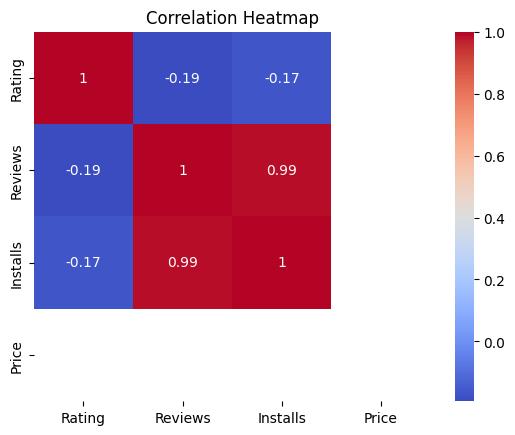

In [16]:
numeric = ['Rating', 'Reviews', 'Installs', 'Price']
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Conclusion
- Most apps belong to **FAMILY** and **GAME** categories.
- Ratings are mostly between 4.0 and 4.5.
- High correlation between **Reviews** and **Installs**.
- Categories like **EVENTS** and **EDUCATION** have top average ratings.
- This analysis helps identify popular and highly rated app categories.